# Mohs Hardness Prediction

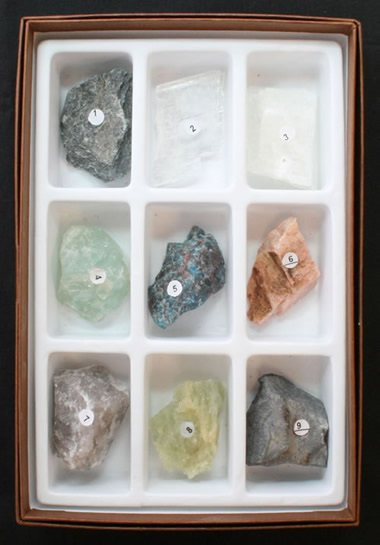
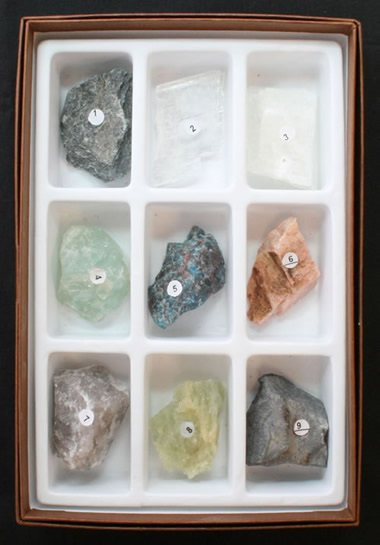

## **1. Introduction**
Hardness is a crucial property of materials that defines their resistance to deformation, wear, and mechanical stress. Predicting hardness accurately is essential in materials science, metallurgy, and industrial applications. Machine learning techniques can help establish relationships between various atomic and chemical properties to predict hardness effectively.  

In this project, we aim to develop a predictive model for hardness using a dataset containing atomic and physical properties of different materials. By leveraging regression algorithms, we will analyze key features and determine the most influential factors affecting hardness.

---

## **2. Aim**
The primary objectives of this study are:  
- To analyze the relationship between atomic/chemical properties and hardness.  
- To apply various regression algorithms for hardness prediction.  
- To identify the most influential features contributing to hardness.  
- To evaluate model performance using appropriate metrics (R² score, RMSE, MAE).  

---

## **3. Dataset and Column Explanation**
The dataset consists of various material properties that serve as predictors for hardness. Below is a brief explanation of each column:  

| **Column Name**             | **Description** |
|-----------------------------|-------------------------------------------|
| `id`                        | Unique identifier for each material sample. |
| `allelectrons_Total`         | Total number of electrons in the material. |
| `density_Total`              | Total density of the material. |
| `allelectrons_Average`       | Average number of electrons per atomic unit. |
| `val_e_Average`              | Average number of valence electrons. |
| `atomicweight_Average`       | Average atomic weight of the elements in the material. |
| `ionenergy_Average`          | Average ionization energy of the elements. |
| `el_neg_chi_Average`         | Average electronegativity of the elements. |
| `R_vdw_element_Average`      | Average van der Waals radius of the elements. |
| `R_cov_element_Average`      | Average covalent radius of the elements. |
| `zaratio_Average`            | Average ratio of nuclear charge to atomic radius. |
| `density_Average`            | Average material density. |
| `Hardness`                   | Target variable representing the material's hardness. |

## Requirements

In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale

## Import Data

In [3]:
df=pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')

## EDA (Exploratory Data Analysis)

In [4]:
df.head()

id  allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0   0               100.0       0.841611                  10.0            4.8   
1   1               100.0       7.558488                  10.0            4.8   
2   2                76.0       8.885992                  15.6            5.6   
3   3               100.0       8.795296                  10.0            4.8   
4   4               116.0       9.577996                  11.6            4.8   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0             20.612526           11.08810               2.766   
1             20.298893           12.04083               2.755   
2             33.739258           12.08630               2.828   
3             20.213349           10.94850               2.648   
4             24.988133           11.82448               2.766   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                  1.732                  0.860         0.496070   
1                  1.631                  0.910         0.492719   
2                  1.788                  0.864         0.481478   
3                  1.626                  0.936         0.489272   
4                  1.682                  0.896         0.492736   

   density_Average  Hardness  
0          0.91457       6.0  
1          0.71760       6.5  
2          1.50633       2.5  
3          0.78937       6.0  
4          1.86481       6.0

In [5]:
df.shape

(10407, 13)

In [6]:
df.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [8]:
df.describe().T

count         mean          std  min          25%  \
id                     10407.0  5203.000000  3004.386460  0.0  2601.500000   
allelectrons_Total     10407.0   128.053516   224.123776  0.0    68.000000   
density_Total          10407.0    14.491342    15.972877  0.0     7.558488   
allelectrons_Average   10407.0    17.033222    10.468734  0.0    10.000000   
val_e_Average          10407.0     4.546789     0.690864  0.0     4.000000   
atomicweight_Average   10407.0    37.507703    26.012313  0.0    20.298893   
ionenergy_Average      10407.0    10.938308     1.408276  0.0    10.590660   
el_neg_chi_Average     10407.0     2.607662     0.334906  0.0     2.530000   
R_vdw_element_Average  10407.0     1.731330     0.192481  0.0     1.672500   
R_cov_element_Average  10407.0     0.944132     0.180017  0.0     0.864000   
zaratio_Average        10407.0     0.493349     0.063080  0.0     0.476196   
density_Average        10407.0     2.132984     1.936656  0.0     0.814800   
Hardness               10407.0     4.647126     1.680525  1.0     3.000000   

                               50%          75%           max  
id                     5203.000000  7804.500000  10406.000000  
allelectrons_Total      100.000000   131.000000  15300.000000  
density_Total            10.650000    16.676996    643.093804  
allelectrons_Average     12.600000    22.000000     67.000000  
val_e_Average             4.714286     4.800000      6.000000  
atomicweight_Average     26.203827    48.719500    167.400000  
ionenergy_Average        11.202760    11.670725     15.245810  
el_neg_chi_Average        2.706000     2.805000      3.443000  
R_vdw_element_Average     1.732727     1.800000      2.250000  
R_cov_element_Average     0.915556     0.981667      1.615840  
zaratio_Average           0.488550     0.496070      0.825990  
density_Average           1.351550     2.741550     10.970000  
Hardness                  5.500000     6.000000     10.000000

## Data Visualization

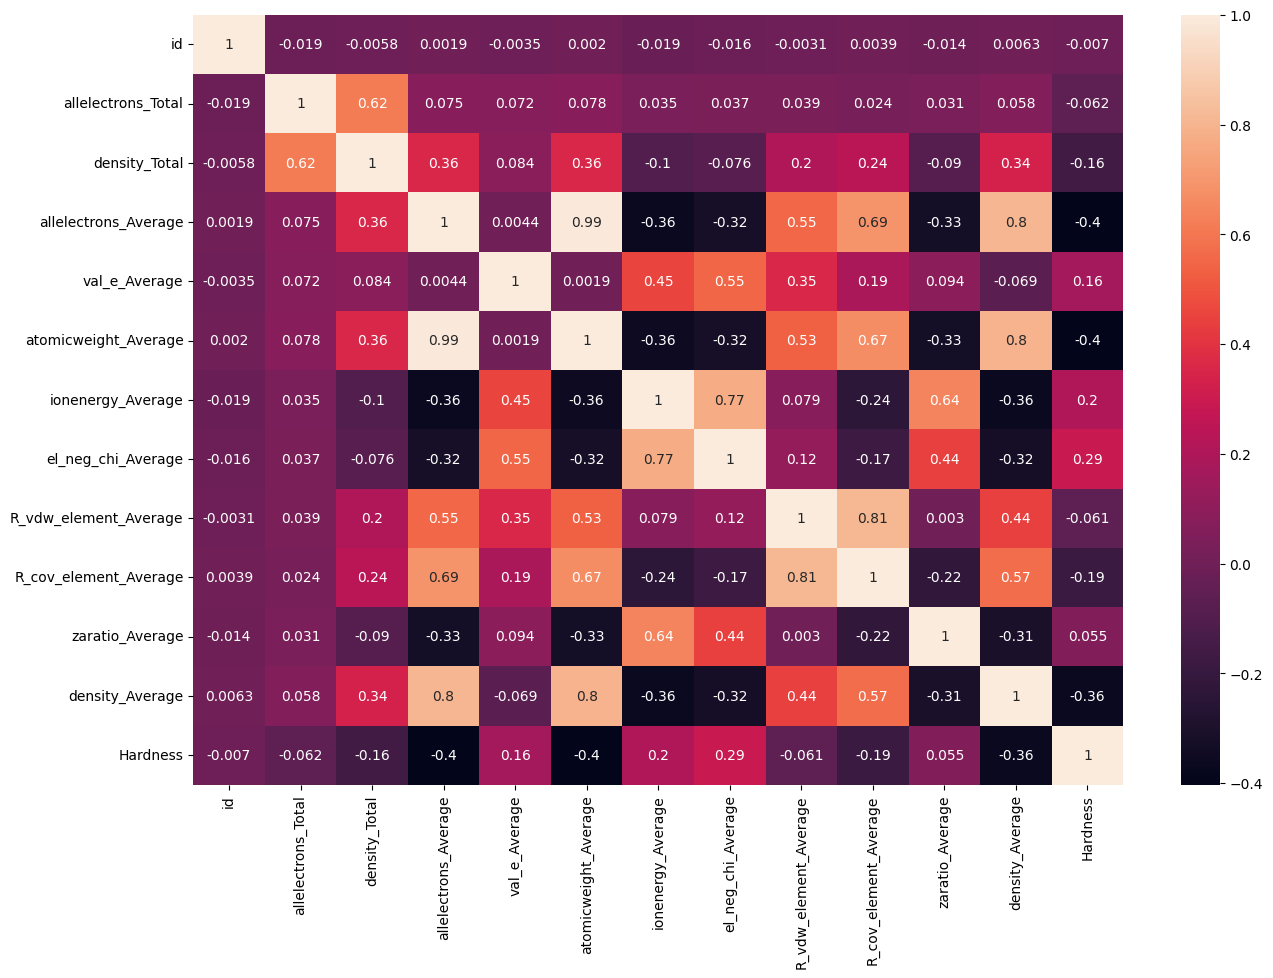

In [133]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True);

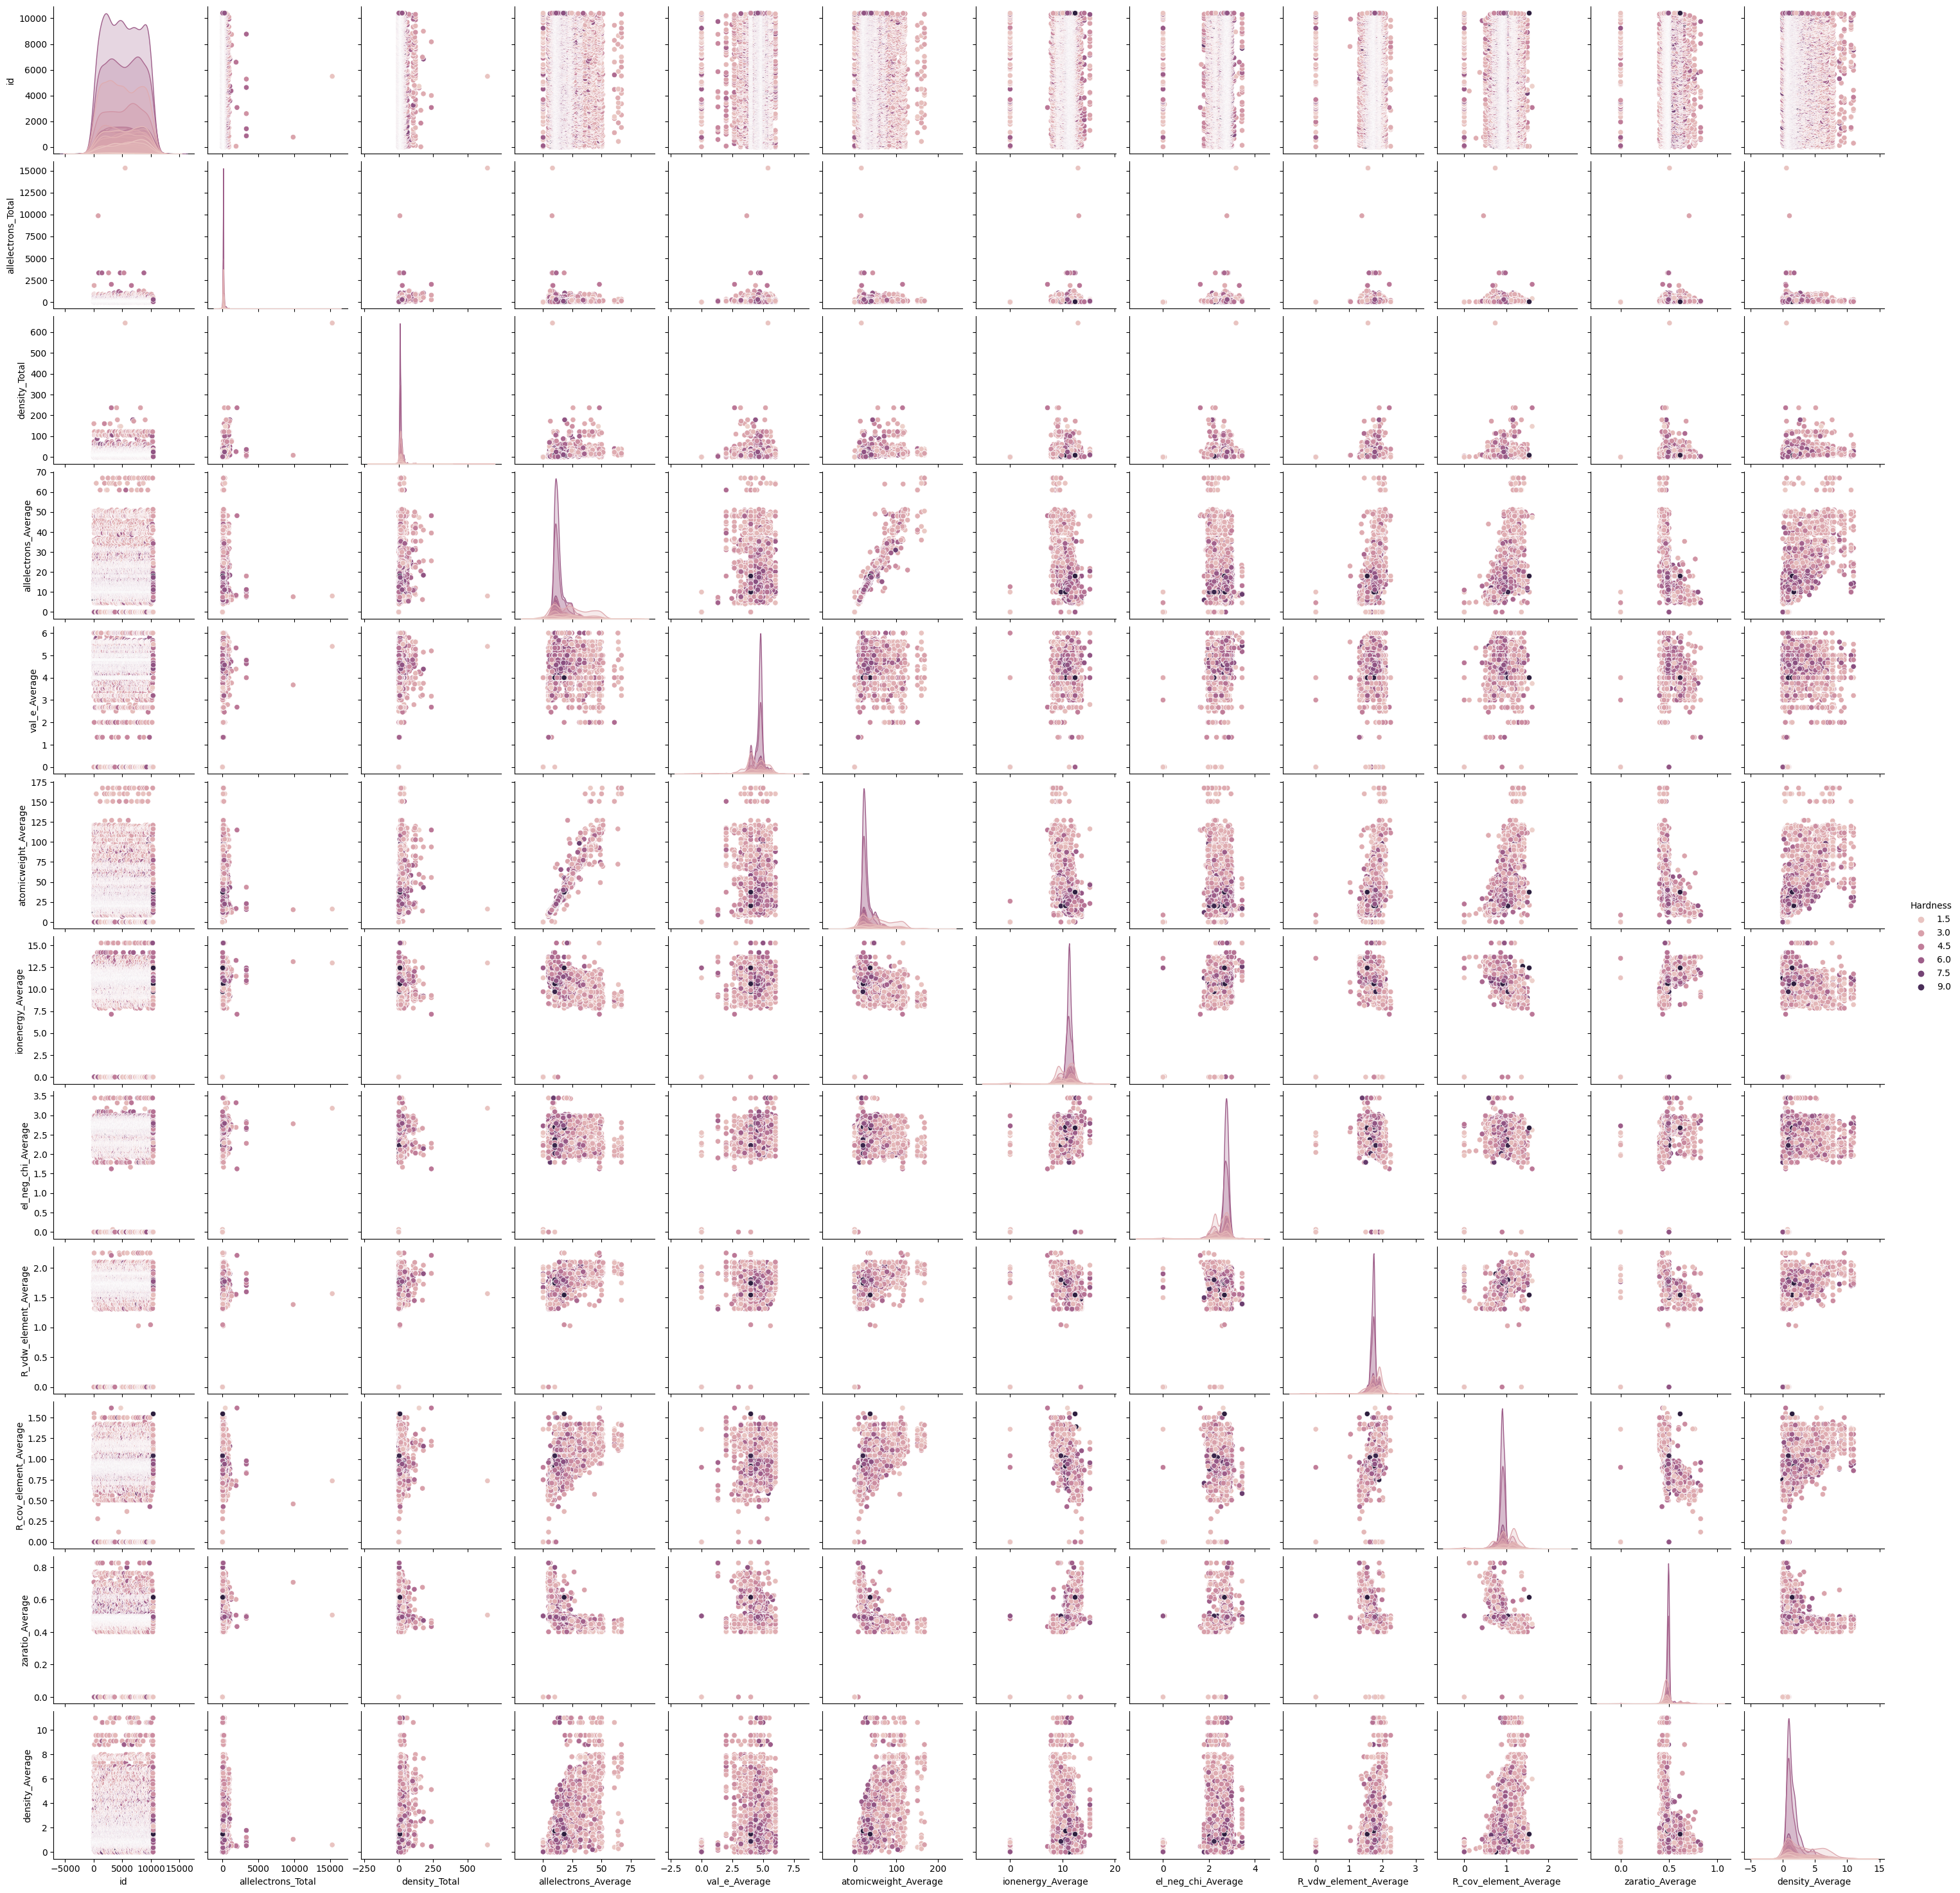

In [134]:
sns.pairplot(df, diag_kind='kde', hue='Hardness')
plt.show()

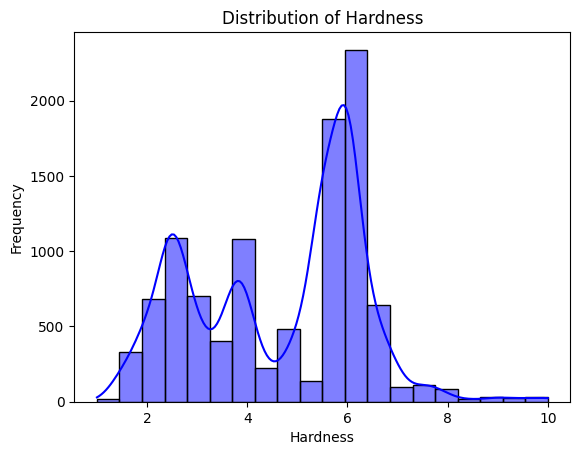

In [135]:
sns.histplot(df['Hardness'], bins=20, kde=True, color='blue')
plt.title('Distribution of Hardness')
plt.xlabel('Hardness')
plt.ylabel('Frequency');

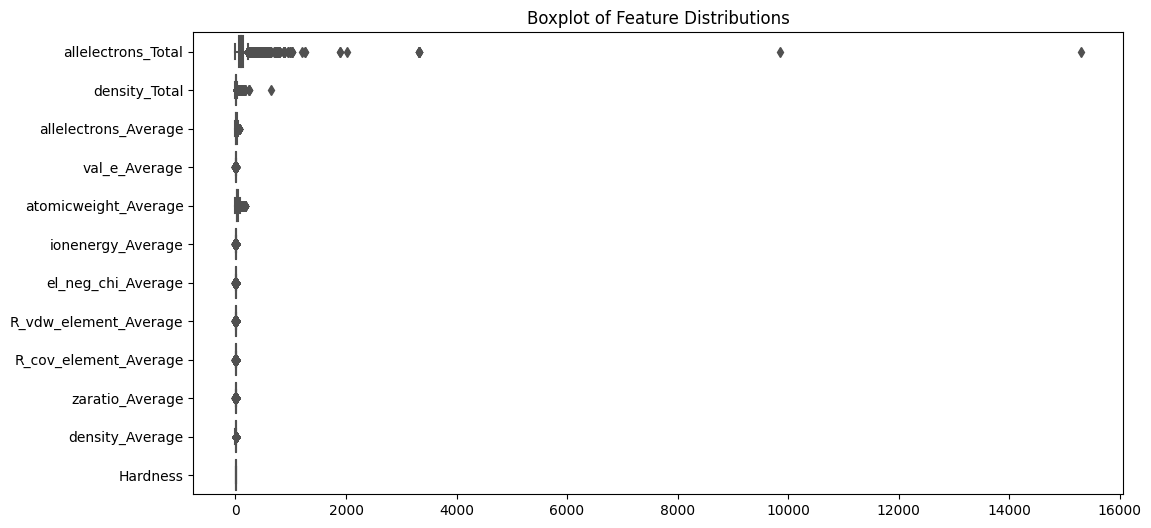

In [136]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=['id']), orient='h', palette='coolwarm')
plt.title('Boxplot of Feature Distributions')
plt.show()

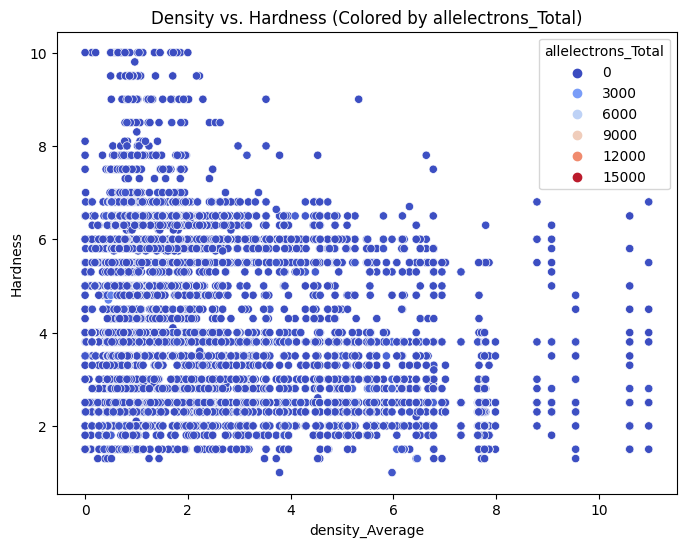

In [137]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['density_Average'], y=df['Hardness'], hue=df['allelectrons_Total'], palette='coolwarm')
plt.title('Density vs. Hardness (Colored by allelectrons_Total)');

## Modelling with Conversational Models

In [9]:
abs(df.corr(numeric_only=True)['Hardness'].sort_values(ascending=False))

Hardness                 1.000000
el_neg_chi_Average       0.290352
ionenergy_Average        0.203203
val_e_Average            0.161715
zaratio_Average          0.055248
id                       0.006989
R_vdw_element_Average    0.061402
allelectrons_Total       0.061687
density_Total            0.161524
R_cov_element_Average    0.189111
density_Average          0.360780
allelectrons_Average     0.400496
atomicweight_Average     0.402948
Name: Hardness, dtype: float64

In [130]:
x=df.drop(['Hardness','id'],axis=1)
y=df[['Hardness']]

In [118]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

def regression_algo(x, y, plot=False):
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    rf = RandomForestRegressor()
    lgbm = LGBMRegressor(verbosity=-1)

    algos = [L, R, Lass, E, ETR, GBR, kn, dt, xgb, rf, lgbm]
    algo_names = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'Extra Tree', 'Gradient Boosting',
                  'KNeighborsRegressor', 'DecisionTreeRegressor', 'XGBRegressor',
                  'RandomForestRegressor', 'LGBMRegressor']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    r_squared = []
    rmse = []
    mae = []

    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))
        rmse.append(mean_squared_error(y_test, p) ** 0.5)
        mae.append(mean_absolute_error(y_test, p))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae

    r_table = result.sort_values('R_Squared', ascending=False)
    
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10, 6))
        plt.plot(y_test.reset_index(drop=True), label='Actual', color='green', linestyle='--')
        plt.plot(pd.Series(y_pred), label='Predicted', color='red', linestyle='--')
        plt.xlabel('Predicted Price')
        plt.ylabel('Actual Price')
        plt.title('Actual vs Predicted Price for Best Model')
        plt.legend()
        plt.show()
    
    return r_table

In [119]:
regression_algo(x,y,plot=False)

R_Squared      RMSE       MAE
LGBMRegressor           0.462446  1.208764  0.893642
Gradient Boosting       0.447915  1.224992  0.922392
RandomForestRegressor   0.431498  1.243072  0.921272
XGBRegressor            0.397358  1.279854  0.946523
KNeighborsRegressor     0.316951  1.362563  1.013194
Ridge                   0.225383  1.451022  1.172036
Linear                  0.225372  1.451032  1.172016
ElasticNet              0.060413  1.598082  1.418586
Lasso                  -0.000084  1.648727  1.468926
DecisionTreeRegressor  -0.148268  1.766656  1.223482
Extra Tree             -0.159494  1.775272  1.272003

## Testing with the Best Conversational Model

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
lgbm = LGBMRegressor(verbosity=-1)
model= lgbm.fit(x_train, y_train)

In [132]:
import joblib
joblib.dump(model, 'best_regression_model.pkl')

['best_regression_model.pkl']

In [121]:
df_test=pd.read_csv('/kaggle/input/playground-series-s3e25/test.csv')

In [122]:
df_test.head()

id  allelectrons_Total  density_Total  allelectrons_Average  \
0  10407               884.0     121.420000                 35.36   
1  10408                90.0       9.931960                 18.00   
2  10409               116.0       7.767992                 11.60   
3  10410               100.0       9.107996                 10.00   
4  10411                55.0       4.030000                 11.00   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0           5.28             82.561240           9.370384               2.298   
1           5.60             39.568056          12.086300               2.868   
2           4.80             23.231818          11.023840               2.644   
3           4.80             20.298893          12.086300               2.828   
4           4.00             22.977675          11.280950               2.455   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                 1.9072               1.200000         0.461899   
1                 1.6520               0.864000         0.476196   
2                 1.7940               0.960000         0.499514   
3                 1.6620               0.792000         0.495796   
4                 1.7500               0.893333         0.476095   

   density_Average  
0          1.79459  
1          1.41194  
2          0.78834  
3          1.20466  
4          0.93456

In [123]:
submission=pd.DataFrame({
    'id':df_test['id']
})

In [124]:
df_test.drop(['id'],axis=1,inplace=True)

In [112]:
df_test['density_Total']=df_test['density_Total']*10

In [126]:
predictions=model.predict(df_test)

In [127]:
submission['Hardness']=predictions

In [128]:
submission.to_csv('submission.csv',index=False)

## Feature Importance

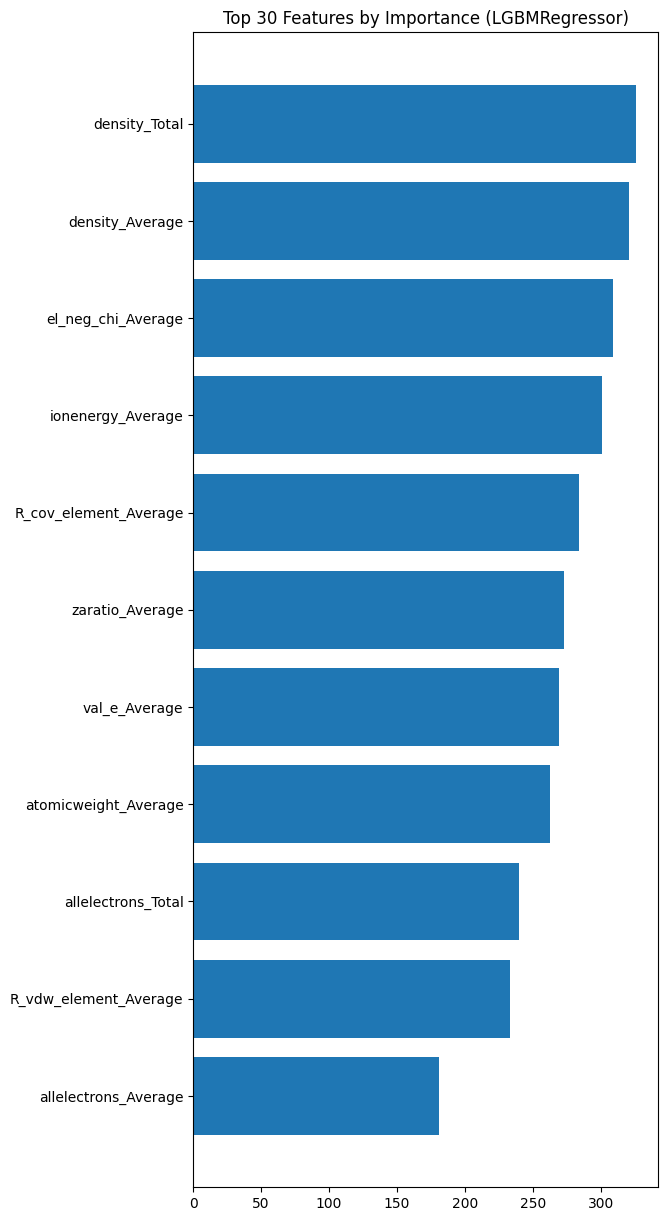

In [28]:
coefficients = np.abs(lgbm.feature_importances_) 

feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': coefficients})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(30)

plt.figure(figsize=(6, 15))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 30 Features by Importance (LGBMRegressor)')
plt.show()

## Modelling with Deep Learning

In [29]:
x=df.drop(['Hardness','id'],axis=1)
y=df[['Hardness']]

In [30]:
model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam')

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=1)

Epoch 1/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 6.3579 - val_loss: 15.6846
Epoch 2/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7003 - val_loss: 5.1412
Epoch 3/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1571 - val_loss: 2.2076
Epoch 4/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3286 - val_loss: 2.4348
Epoch 5/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3417 - val_loss: 2.4661
Epoch 6/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3242 - val_loss: 2.2123
Epoch 7/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3570 - val_loss: 2.3493
Epoch 8/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1772 - val_loss: 2.7541
Epoch 9/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6966 - val_loss: 2.4395
Epoch 10/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5433 - val_loss: 2.3238
Epoch 11/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1933 - val_loss: 2.0658
Epoch 12/50
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [33]:
predictions=model.predict(x_test)
r2_score(y_test,predictions)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.28842473122729595

In [34]:
mean_squared_error(y_test,predictions)**0.5

1.390723887546804

<Axes: >

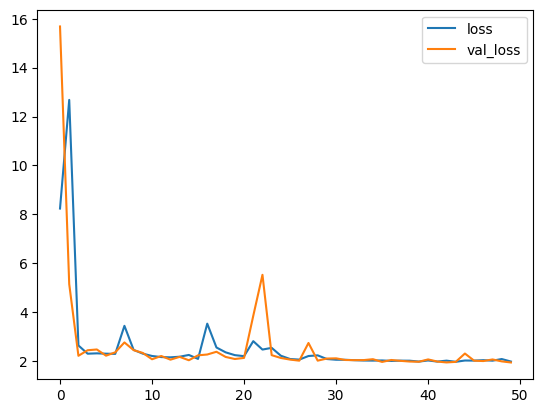

In [35]:
loss_f=pd.DataFrame(history.history)
loss_f.plot()

## Testing the Deep Learning Model

In [36]:
predictions=model.predict(df_test)

217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [37]:
submission['Hardness']=predictions

In [38]:
submission.to_csv('submission.csv',index=False)

## **Conclusion**

### **1. Summary of Findings**
In this study, we aimed to predict the hardness of materials using machine learning and deep learning models. We trained multiple regression models and evaluated their performance using metrics such as R² score, Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).  

#### **Conversational Models (Machine Learning)**
Among the machine learning models, **LGBMRegressor** performed the best with:  
- **R² Score:** 0.462  
- **RMSE:** 1.209  
- **MAE:** 0.894  

Other models such as **Gradient Boosting (0.448 R²)** and **Random Forest (0.431 R²)** also provided relatively strong results, while simpler models like **Lasso (-0.000 R²)** and **Decision Tree (-0.148 R²)** underperformed.  

#### **Deep Learning Model**
The deep learning model achieved:  
- **R² Score:** 0.288  
- **Mean Squared Error:** 1.391  

This indicates that the deep learning model did not outperform the best machine learning models in this case.  

---

### **2. Interpretation and Insights**
- **LGBMRegressor emerged as the best model** in terms of prediction accuracy, making it the most suitable choice for hardness prediction in this dataset.  
- **Tree-based ensemble methods (LGBM, Gradient Boosting, and Random Forest) performed better than linear models**, suggesting that the relationship between features and hardness is non-linear.  
- **Deep learning underperformed compared to LGBM and Gradient Boosting**, possibly due to limited data, model complexity, or hyperparameter tuning challenges.  

--